In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix # Changed 'confussion_matrix' to 'confusion_matrix'
import warnings
warnings.filterwarnings("ignore")

In [11]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("parisrohan/credit-score-classification")

print("Path to dataset files:", path)

100%|██████████| 9.51M/9.51M [00:00<00:00, 81.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/parisrohan/credit-score-classification/versions/1


In [13]:
import pandas as pd
import kagglehub

# Download latest version
path = kagglehub.dataset_download("parisrohan/credit-score-classification")
print("Path to dataset files:", path)

# Assuming the dataset is a CSV file named 'train.csv' in the downloaded path
# Please adjust the file name and type accordingly if it's different.
df = pd.read_csv(path + '/train.csv')  # Load the dataset into a DataFrame called 'df'

df.head(10) # Now this line should work correctly

Path to dataset files: /root/.cache/kagglehub/datasets/parisrohan/credit-score-classification/versions/1


ID Customer_ID     Month  ...                 Payment_Behaviour     Monthly_Balance Credit_Score
0  0x1602   CUS_0xd40   January  ...   High_spent_Small_value_payments  312.49408867943663         Good
1  0x1603   CUS_0xd40  February  ...    Low_spent_Large_value_payments  284.62916249607184         Good
2  0x1604   CUS_0xd40     March  ...   Low_spent_Medium_value_payments   331.2098628537912         Good
3  0x1605   CUS_0xd40     April  ...    Low_spent_Small_value_payments  223.45130972736786         Good
4  0x1606   CUS_0xd40       May  ...  High_spent_Medium_value_payments  341.48923103222177         Good
5  0x1607   CUS_0xd40      June  ...                            !@9#%8   340.4792117872438         Good
6  0x1608   CUS_0xd40      July  ...    Low_spent_Small_value_payments   244.5653167062043         Good
7  0x1609   CUS_0xd40    August  ...  High_spent_Medium_value_payments  358.12416760938714     Standard
8  0x160e  CUS_0x21b1   January  ...    Low_spent_Small_value_payments  470.69062692529184     Standard
9  0x160f  CUS_0x21b1  February  ...   High_spent_Large_value_payments   484.5912142650067         Good

[10 rows x 28 columns]

In [14]:

# Data Summary
df.describe()

Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Utilization_Ratio  Total_EMI_per_month
count           84998.000000      100000.000000  ...             100000.000000        100000.000000
mean             4194.170850          17.091280  ...                 32.285173          1403.118217
std              3183.686167         117.404834  ...                  5.116875          8306.041270
min               303.645417          -1.000000  ...                 20.000000             0.000000
25%              1625.568229           3.000000  ...                 28.052567            30.306660
50%              3093.745000           6.000000  ...                 32.305784            69.249473
75%              5957.448333           7.000000  ...                 36.496663           161.224249
max             15204.633333        1798.000000  ...                 50.000000         82331.000000

[8 rows x 8 columns]

In [15]:
# Feature Data Type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [16]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [17]:
#Display no of rows and columns
df.shape

(100000, 28)

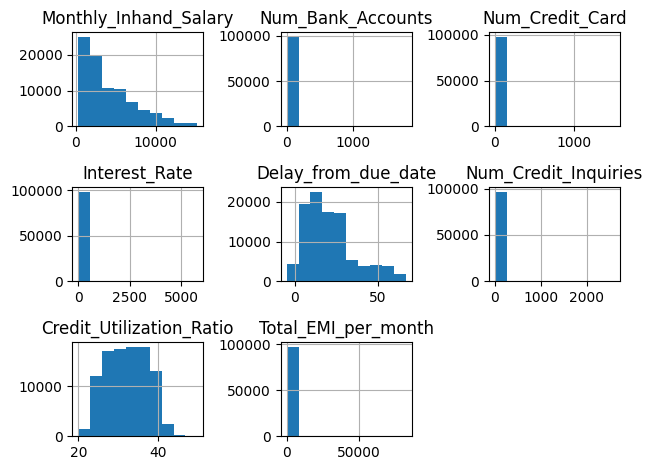

In [18]:
df.hist()
plt.tight_layout()
plt.show()

In [24]:
# Print the available columns in the DataFrame
print(df.columns)

# Dropping unwanted Data using the correct column names
df = df.drop(columns=[col for col in ['ID','Customer_ID','Name','Age','SSN'] if col in df.columns])
df

Index(['Month', 'Occupation', 'Annual_Income', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix',
       'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')


Month Occupation  ...     Monthly_Balance  Credit_Score
0       January  Scientist  ...  312.49408867943663          Good
1      February  Scientist  ...  284.62916249607184          Good
2         March  Scientist  ...   331.2098628537912          Good
3         April  Scientist  ...  223.45130972736786          Good
4           May  Scientist  ...  341.48923103222177          Good
...         ...        ...  ...                 ...           ...
99995     April   Mechanic  ...          479.866228          Poor
99996       May   Mechanic  ...           496.65161          Poor
99997      June   Mechanic  ...          516.809083          Poor
99998      July   Mechanic  ...          319.164979      Standard
99999    August   Mechanic  ...          393.673696          Poor

[100000 rows x 23 columns]

In [27]:
# Check for Missing Values
df.isnull().sum()

Month                           0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [28]:
# Dropping the Missing Values
df = df.dropna()
df

Month Occupation  ...     Monthly_Balance  Credit_Score
0       January  Scientist  ...  312.49408867943663          Good
6          July  Scientist  ...   244.5653167062043          Good
8       January    _______  ...  470.69062692529184      Standard
9      February    Teacher  ...   484.5912142650067          Good
10        March    Teacher  ...  466.46647639764313      Standard
...         ...        ...  ...                 ...           ...
99994     March   Mechanic  ...          410.256158          Poor
99995     April   Mechanic  ...          479.866228          Poor
99996       May   Mechanic  ...           496.65161          Poor
99997      June   Mechanic  ...          516.809083          Poor
99999    August   Mechanic  ...          393.673696          Poor

[58933 rows x 23 columns]

In [29]:
# Check for missing values after dropping
df.isnull().sum()

Month                       0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [30]:
df.drop(df[df["Occupation"]=='_______'].index,inplace=True)
df.drop(df[df["Credit_Mix"]=='_'].index,inplace=True)
df


Month Occupation  ...     Monthly_Balance  Credit_Score
6          July  Scientist  ...   244.5653167062043          Good
9      February    Teacher  ...   484.5912142650067          Good
12          May    Teacher  ...   444.8670318506144          Good
13         June    Teacher  ...    481.505261949182          Good
15       August    Teacher  ...  356.07810855965045          Good
...         ...        ...  ...                 ...           ...
99985  February  Architect  ...          273.750662          Poor
99986     March  Architect  ...          345.743101          Poor
99991    August  Architect  ...          337.362988      Standard
99997      June   Mechanic  ...          516.809083          Poor
99999    August   Mechanic  ...          393.673696          Poor

[43757 rows x 23 columns]

In [31]:
df

Month Occupation  ...     Monthly_Balance  Credit_Score
6          July  Scientist  ...   244.5653167062043          Good
9      February    Teacher  ...   484.5912142650067          Good
12          May    Teacher  ...   444.8670318506144          Good
13         June    Teacher  ...    481.505261949182          Good
15       August    Teacher  ...  356.07810855965045          Good
...         ...        ...  ...                 ...           ...
99985  February  Architect  ...          273.750662          Poor
99986     March  Architect  ...          345.743101          Poor
99991    August  Architect  ...          337.362988      Standard
99997      June   Mechanic  ...          516.809083          Poor
99999    August   Mechanic  ...          393.673696          Poor

[43757 rows x 23 columns]

In [32]:
# removes underscores
df = df.applymap(lambda x:x.replace('_','') if isinstance(x,str) else x)
df

Month Occupation  ...     Monthly_Balance  Credit_Score
6          July  Scientist  ...   244.5653167062043          Good
9      February    Teacher  ...   484.5912142650067          Good
12          May    Teacher  ...   444.8670318506144          Good
13         June    Teacher  ...    481.505261949182          Good
15       August    Teacher  ...  356.07810855965045          Good
...         ...        ...  ...                 ...           ...
99985  February  Architect  ...          273.750662          Poor
99986     March  Architect  ...          345.743101          Poor
99991    August  Architect  ...          337.362988      Standard
99997      June   Mechanic  ...          516.809083          Poor
99999    August   Mechanic  ...          393.673696          Poor

[43757 rows x 23 columns]

In [33]:
df['Payment_Behaviour'].replace('!@9#%8',np.nan)
df

Month Occupation  ...     Monthly_Balance  Credit_Score
6          July  Scientist  ...   244.5653167062043          Good
9      February    Teacher  ...   484.5912142650067          Good
12          May    Teacher  ...   444.8670318506144          Good
13         June    Teacher  ...    481.505261949182          Good
15       August    Teacher  ...  356.07810855965045          Good
...         ...        ...  ...                 ...           ...
99985  February  Architect  ...          273.750662          Poor
99986     March  Architect  ...          345.743101          Poor
99991    August  Architect  ...          337.362988      Standard
99997      June   Mechanic  ...          516.809083          Poor
99999    August   Mechanic  ...          393.673696          Poor

[43757 rows x 23 columns]

<Axes: xlabel='count', ylabel='Occupation'>

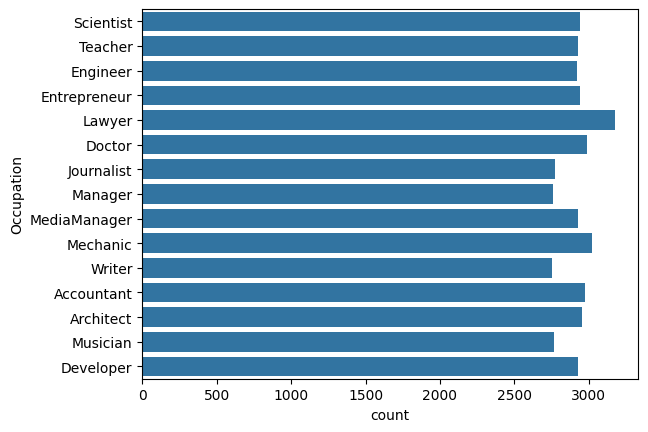

In [34]:
sns.countplot(y='Occupation',data=df)

In [35]:
# Converts Categorical values to Continous Values
cat = ['Month','Occupation','Type_of_Loan','Credit_Mix','Credit_History_Age','Payment_of_Min_Amount','Payment_Behaviour']
le = LabelEncoder()
for col in cat:
    df[col] = le.fit_transform(df[col])
df

Month  Occupation Annual_Income  ...  Payment_Behaviour     Monthly_Balance  Credit_Score
6          4          12      19114.12  ...                  6   244.5653167062043          Good
9          2          13      34847.84  ...                  1   484.5912142650067          Good
12         7          13      34847.84  ...                  6   444.8670318506144          Good
13         5          13      34847.84  ...                  1    481.505261949182          Good
15         1          13      34847.84  ...                  6  356.07810855965045          Good
...      ...         ...           ...  ...                ...                 ...           ...
99985      2           1      20002.88  ...                  6          273.750662          Poor
99986      6           1      20002.88  ...                  6          345.743101          Poor
99991      1           1      20002.88  ...                  1          337.362988      Standard
99997      5           9      39628.99  ...                  1          516.809083          Poor
99999      1           9      39628.99  ...                  0          393.673696          Poor

[43757 rows x 23 columns]

<Axes: xlabel='count', ylabel='Month'>

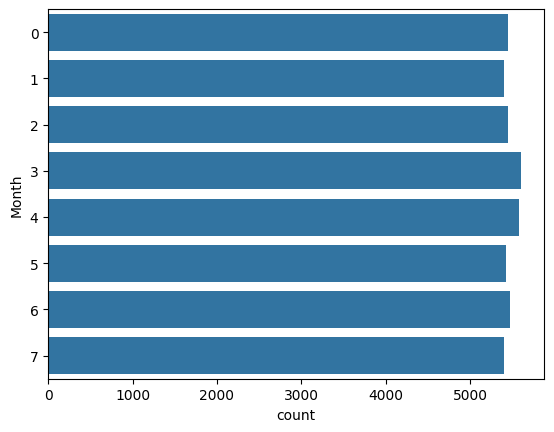

In [36]:
sns.countplot(y='Month',data=df)

<Axes: >

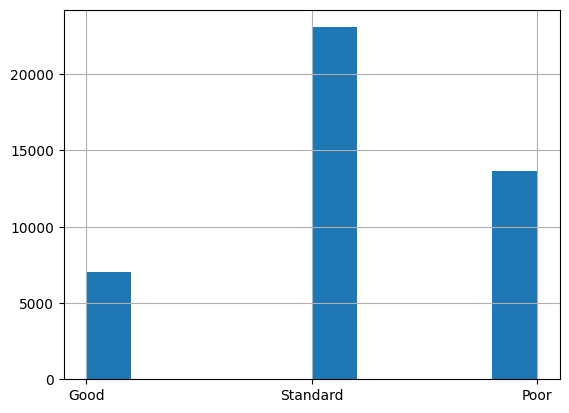

In [37]:
# Histogram Representation of Credit Score (Target Attribute)
df['Credit_Score'].hist()

<Axes: xlabel='count', ylabel='Payment_Behaviour'>

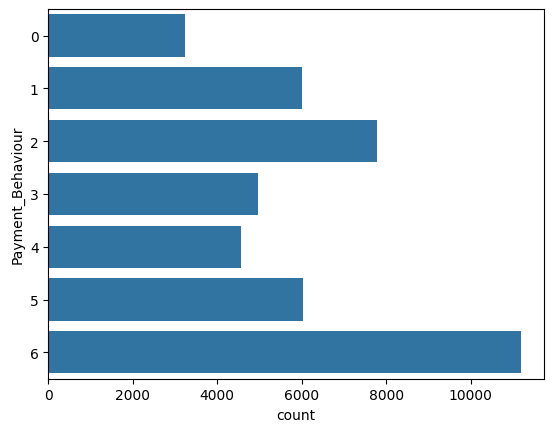

In [38]:
# Countplot Representation of Payment_Behaviour
sns.countplot(y='Payment_Behaviour',data=df)

<Axes: xlabel='count', ylabel='Payment_Behaviour'>

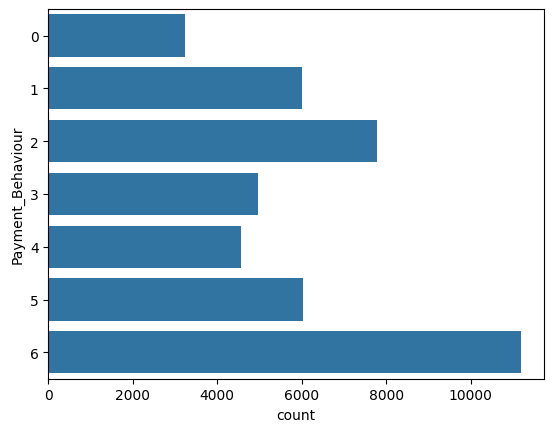

In [39]:
sns.countplot(y='Payment_Behaviour',data=df)

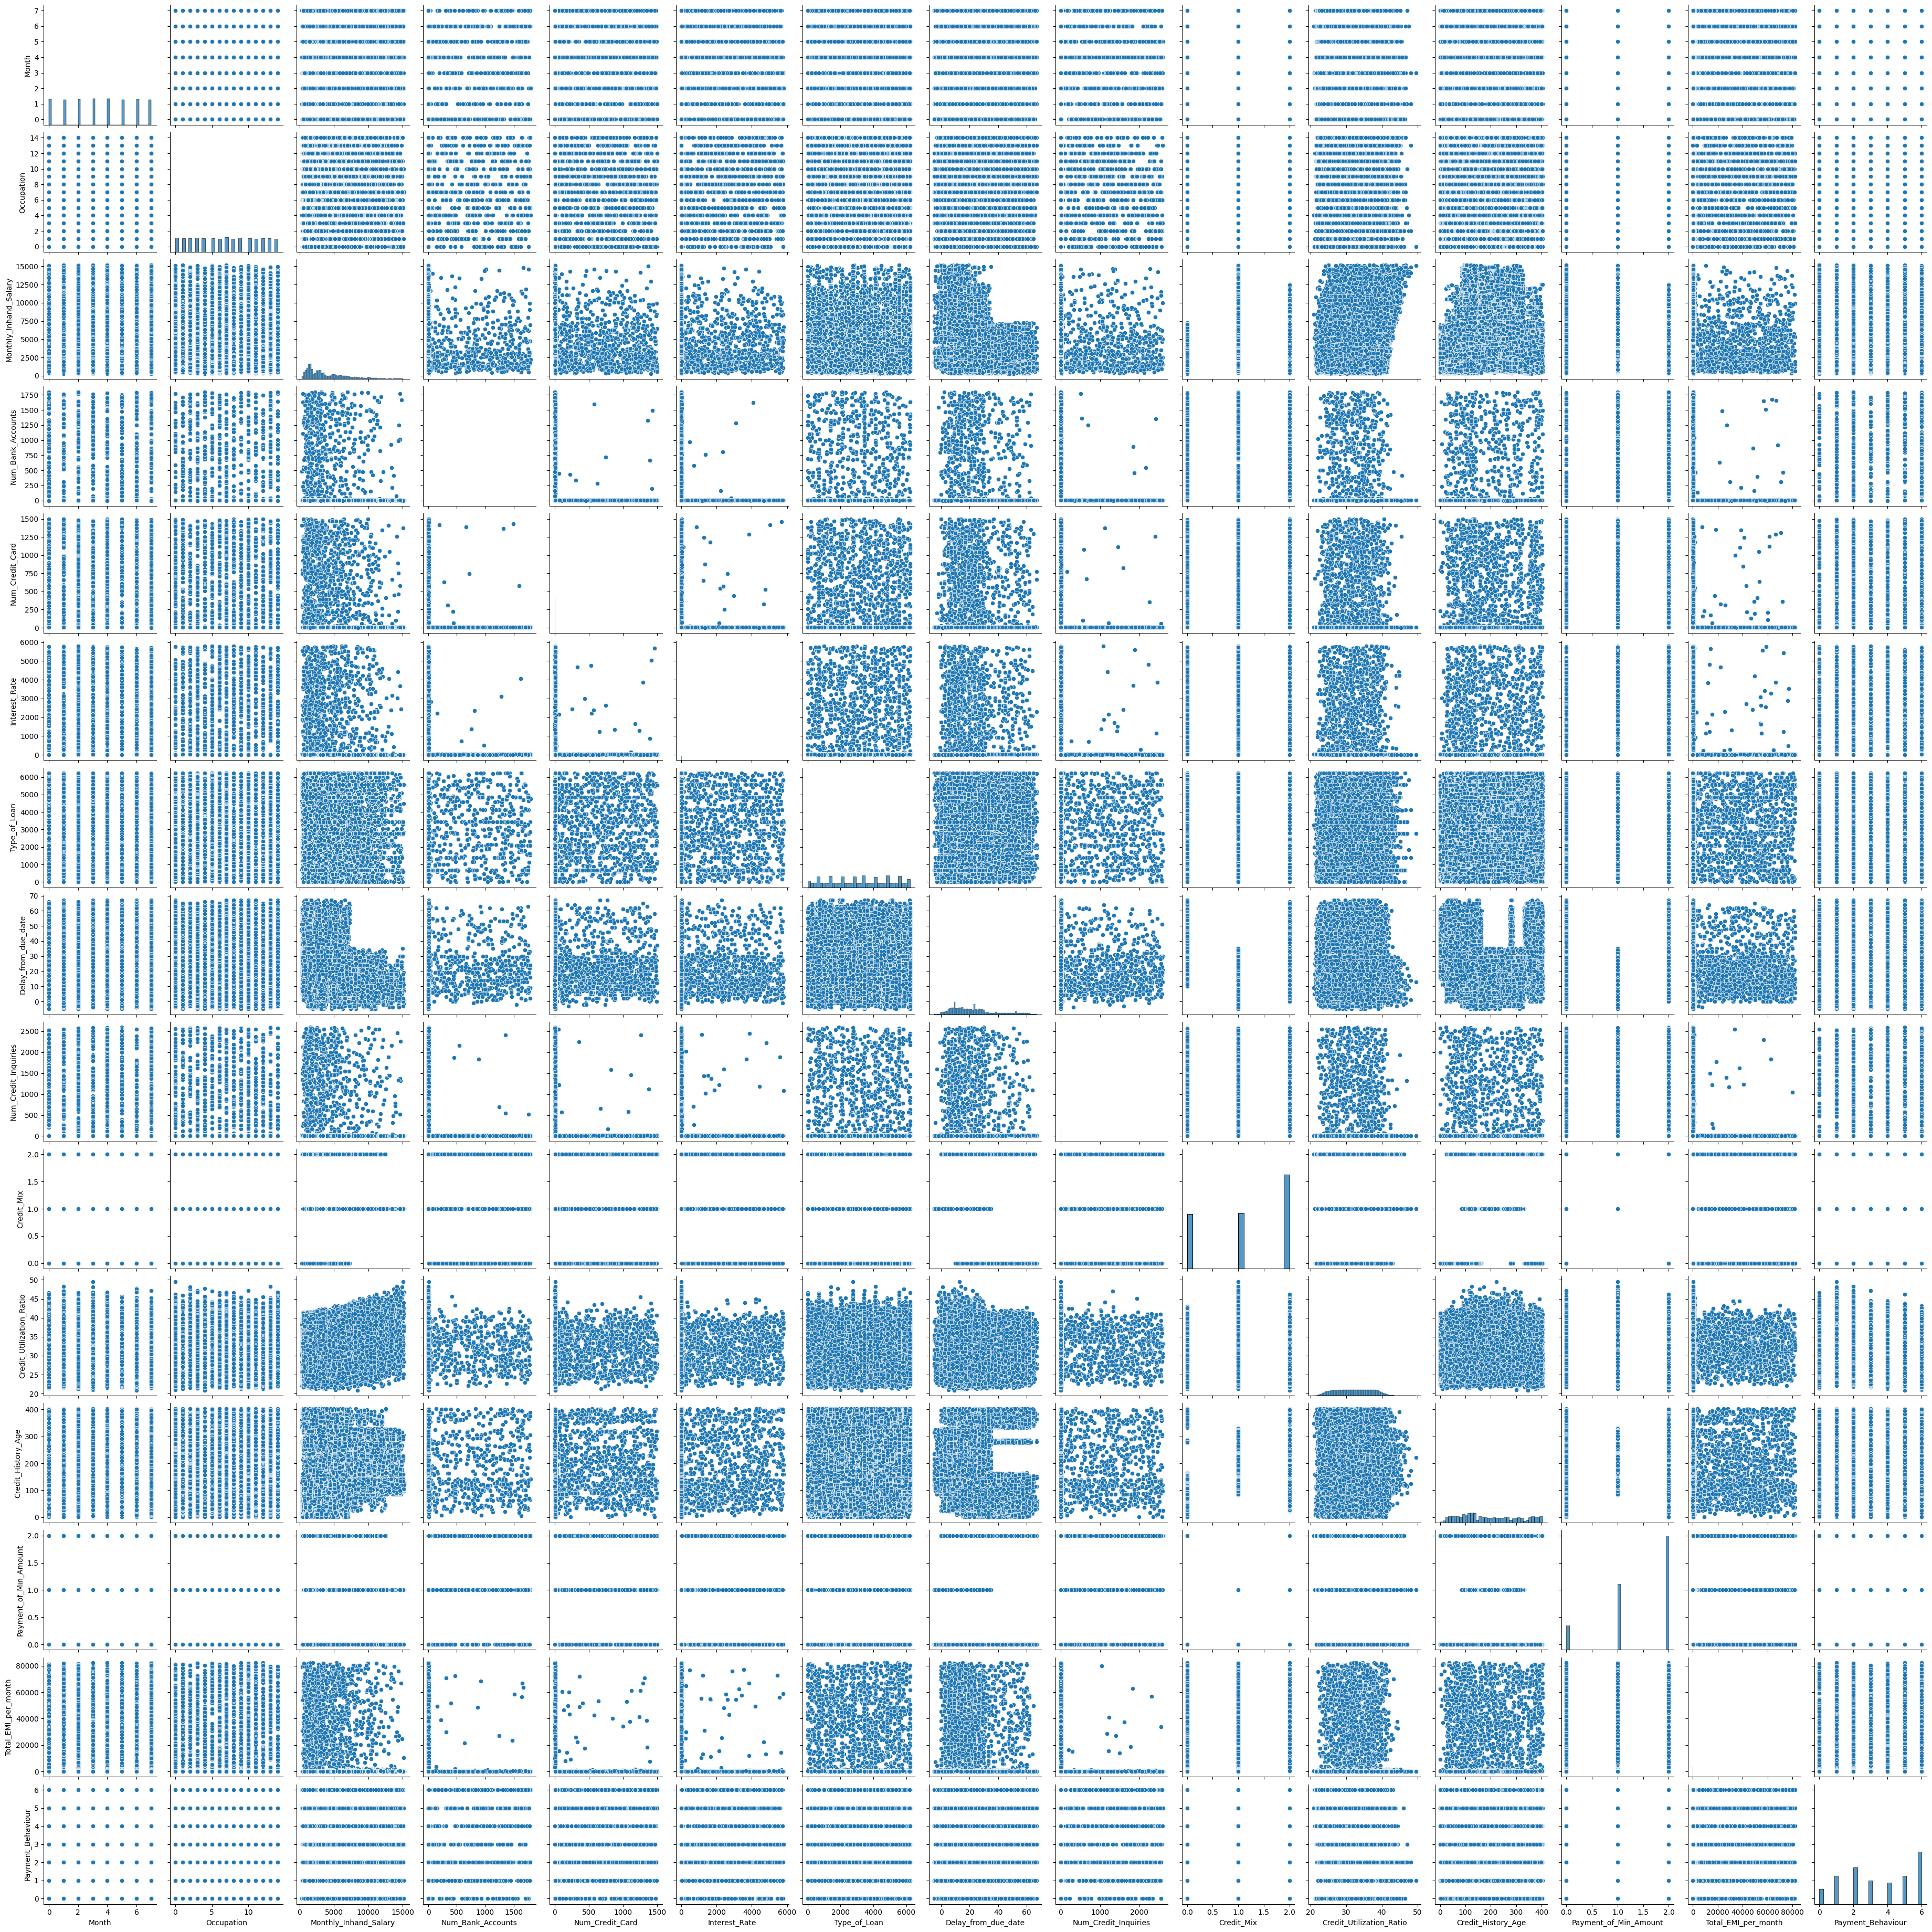

In [40]:
sns.pairplot(df)

In [43]:
x = df.drop(columns='Credit_Score')
y = df['Credit_Score']

In [44]:
x = x.replace('',np.nan).astype(float)

In [45]:
x.isnull().sum()

Month                         0
Occupation                    0
Annual_Income                 0
Monthly_Inhand_Salary         0
Num_Bank_Accounts             0
Num_Credit_Card               0
Interest_Rate                 0
Num_of_Loan                   0
Type_of_Loan                  0
Delay_from_due_date           0
Num_of_Delayed_Payment        0
Changed_Credit_Limit        921
Num_Credit_Inquiries          0
Credit_Mix                    0
Outstanding_Debt              0
Credit_Utilization_Ratio      0
Credit_History_Age            0
Payment_of_Min_Amount         0
Total_EMI_per_month           0
Amount_invested_monthly       0
Payment_Behaviour             0
Monthly_Balance               0
dtype: int64

In [49]:
x['Changed_Credit_Limit'].fillna(0, inplace=True)

In [50]:
x.isnull().sum()

Month                       0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
dtype: int64

In [51]:
x

Month  Occupation  ...  Payment_Behaviour  Monthly_Balance
6        4.0        12.0  ...                6.0       244.565317
9        2.0        13.0  ...                1.0       484.591214
12       7.0        13.0  ...                6.0       444.867032
13       5.0        13.0  ...                1.0       481.505262
15       1.0        13.0  ...                6.0       356.078109
...      ...         ...  ...                ...              ...
99985    2.0         1.0  ...                6.0       273.750662
99986    6.0         1.0  ...                6.0       345.743101
99991    1.0         1.0  ...                1.0       337.362988
99997    5.0         9.0  ...                1.0       516.809083
99999    1.0         9.0  ...                0.0       393.673696

[43757 rows x 22 columns]

In [52]:
# Data Normalization
scaler = StandardScaler()
scaler.fit_transform(x)
x

Month  Occupation  ...  Payment_Behaviour  Monthly_Balance
6        4.0        12.0  ...                6.0       244.565317
9        2.0        13.0  ...                1.0       484.591214
12       7.0        13.0  ...                6.0       444.867032
13       5.0        13.0  ...                1.0       481.505262
15       1.0        13.0  ...                6.0       356.078109
...      ...         ...  ...                ...              ...
99985    2.0         1.0  ...                6.0       273.750662
99986    6.0         1.0  ...                6.0       345.743101
99991    1.0         1.0  ...                1.0       337.362988
99997    5.0         9.0  ...                1.0       516.809083
99999    1.0         9.0  ...                0.0       393.673696

[43757 rows x 22 columns]

In [53]:
# Train Test Split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [54]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier
Rmodel = RandomForestClassifier(n_estimators=100,random_state=42)
Rmodel.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [55]:
predict = Rmodel.predict(x_test)
predict

array(['Standard', 'Poor', 'Poor', ..., 'Standard', 'Good', 'Poor'],
      dtype=object)

In [56]:
Rscore = accuracy_score(y_test,predict)*100
Rscore

77.35374771480804

In [57]:
cm = confusion_matrix(y_test,predict)
cm

array([[1008,   13,  388],
       [  68, 2152,  533],
       [ 351,  629, 3610]])

In [60]:
import numpy as np # Import the numpy library

# ... (your existing code) ...

cm = confusion_matrix(y_test, predict)
print(cm)  # Print the confusion matrix directly

# OR

cm_array = np.array([[1011,    9,  431],
                     [  50, 2150,  514],
                     [ 335,  586, 3666]], dtype=np.int64) # Use np.array
print(cm_array)  # Print the NumPy array

[[1008   13  388]
 [  68 2152  533]
 [ 351  629 3610]]
[[1011    9  431]
 [  50 2150  514]
 [ 335  586 3666]]


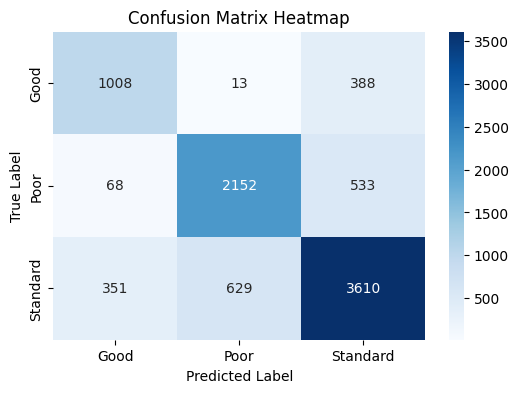

In [61]:
label_name = ['Good','Poor','Standard']
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",xticklabels = label_name,yticklabels = label_name)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [62]:
Emodel = ExtraTreesClassifier(n_estimators=100,random_state=40)
Emodel.fit(x_train,y_train)

ExtraTreesClassifier(random_state=40)

In [63]:
Epredict = Emodel.predict(x_test)
Epredict

array(['Standard', 'Poor', 'Poor', ..., 'Standard', 'Standard',
       'Standard'], dtype=object)

In [64]:

Escore = accuracy_score(y_test,Epredict)*100
Escore

74.79433272394881

In [66]:
Ecm = confusion_matrix(y_test,Epredict) # Changed 'Kpredict' to 'Epredict'
Ecm

array([[1005,    7,  397],
       [ 123, 2014,  616],
       [ 450,  613, 3527]])

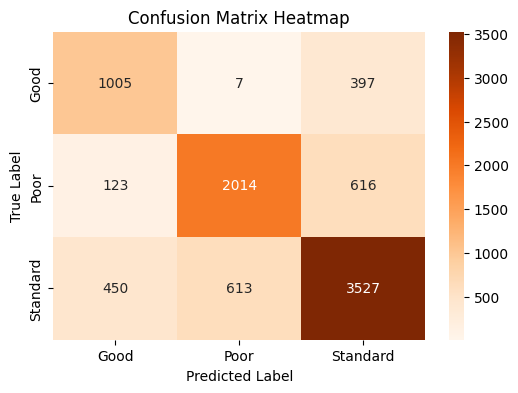

In [67]:

label_name = ['Good','Poor','Standard']
plt.figure(figsize=(6, 4))
sns.heatmap(Ecm, annot=True, fmt="d", cmap="Oranges",xticklabels = label_name,yticklabels = label_name)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [68]:
Amodel = AdaBoostClassifier(n_estimators=100)
Amodel.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=100)

In [69]:

Apredict = Amodel.predict(x_test)
Apredict

array(['Standard', 'Poor', 'Poor', ..., 'Standard', 'Good', 'Poor'],
      dtype=object)

In [70]:
Ascore = accuracy_score(y_test,Apredict)*100
Ascore

64.22531992687385

In [71]:
Acm = confusion_matrix(y_test,Apredict)
Acm

array([[ 652,   32,  725],
       [  92, 1640, 1021],
       [ 350,  911, 3329]])

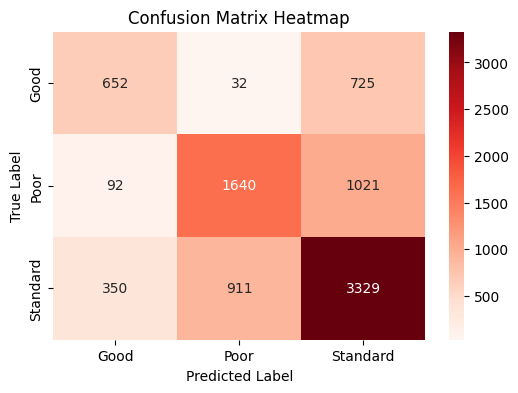

In [72]:
label_name = ['Good','Poor','Standard']
plt.figure(figsize=(6, 4))
sns.heatmap(Acm, annot=True, fmt="d", cmap="Reds",xticklabels = label_name,yticklabels = label_name)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [73]:
from sklearn.neighbors import KNeighborsClassifier
Kmodel = KNeighborsClassifier(n_neighbors=3)
Kmodel.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [74]:
Kpredict = Kmodel.predict(x_test)
Kpredict

array(['Poor', 'Poor', 'Poor', ..., 'Poor', 'Good', 'Standard'],
      dtype=object)

In [75]:
kscore = accuracy_score(y_test,Kpredict)*100
kscore

68.33866544789763

In [76]:

kcm = confusion_matrix(y_test,Kpredict)
kcm

array([[ 853,   58,  498],
       [ 156, 1892,  705],
       [ 575,  779, 3236]])

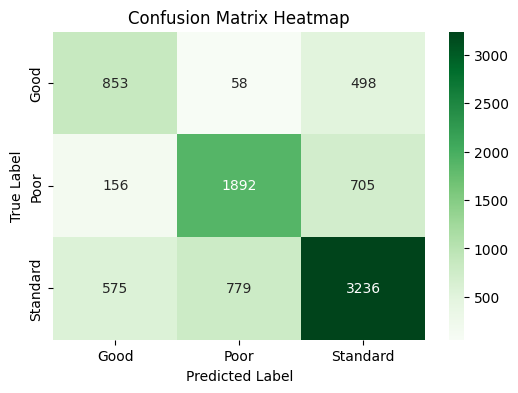

In [77]:
label_name = ['Good','Poor','Standard']
plt.figure(figsize=(6, 4))
sns.heatmap(kcm, annot=True, fmt="d", cmap="Greens",xticklabels = label_name,yticklabels = label_name)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [78]:

from sklearn.tree import DecisionTreeClassifier
Dmodel = DecisionTreeClassifier()
Dmodel.fit(x_train,y_train)

DecisionTreeClassifier()

In [79]:

Dpredict = Dmodel.predict(x_test)
Dpredict

array(['Standard', 'Poor', 'Poor', ..., 'Standard', 'Good', 'Poor'],
      dtype=object)

In [80]:
Dscore = accuracy_score(y_test,Dpredict)*100
Dscore

67.53884826325411

In [81]:
dcm = confusion_matrix(y_test,Dpredict)
dcm

array([[ 810,   79,  520],
       [ 104, 1824,  825],
       [ 499,  814, 3277]])

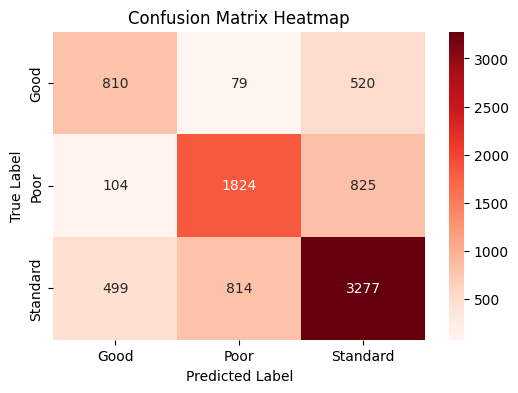

In [82]:
label_name = ['Good','Poor','Standard']
plt.figure(figsize=(6, 4))
sns.heatmap(dcm, annot=True, fmt="d", cmap="Reds",xticklabels = label_name,yticklabels = label_name)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [83]:
from sklearn.svm import SVC
smodel = SVC()
smodel.fit(x_train,y_train)

SVC()

In [84]:
spredict = smodel.predict(x_test)
spredict

array(['Standard', 'Standard', 'Standard', ..., 'Standard', 'Standard',
       'Standard'], dtype=object)

In [85]:
Sscore = accuracy_score(y_test,spredict)*100
Sscore

52.445155393053014

In [86]:
scm = confusion_matrix(y_test,spredict)
scm

array([[   0,    0, 1409],
       [   0,    0, 2753],
       [   0,    0, 4590]])

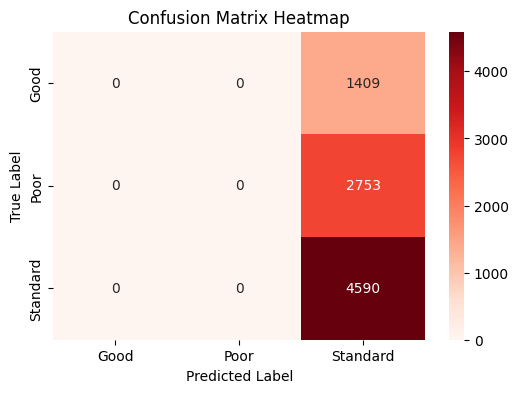

In [87]:
label_name = ['Good','Poor','Standard']
plt.figure(figsize=(6, 4))
sns.heatmap(scm, annot=True, fmt="d", cmap="Reds",xticklabels = label_name,yticklabels = label_name)
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()